http://benalexkeen.com/k-means-clustering-in-python/
K-means Clustering in Python

K-means clustering is a clustering algorithm that aims to partition n
observations into k

clusters.

There are 3 steps:

    Initialisation – K initial “means” (centroids) are generated at random
    Assignment – K clusters are created by associating each observation with the nearest centroid
    Update – The centroid of the clusters becomes the new mean

Assignment and Update are repeated iteratively until convergence

The end result is that the sum of squared errors is minimised between points and their respective centroids.

We’ll do this manually first, then show how it’s done using scikit-learn

Let’s view it in action using k=3:

In [1]:
## Initialisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})


{1: [26, 16], 2: [68, 42], 3: [55, 76]}
[26, 16]
[68, 42]
[55, 76]


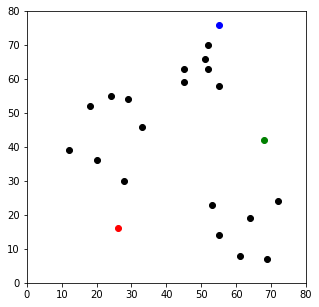

In [2]:
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)

}
print(centroids)    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    print(centroids[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

['distance_from_1', 'distance_from_2', 'distance_from_3']


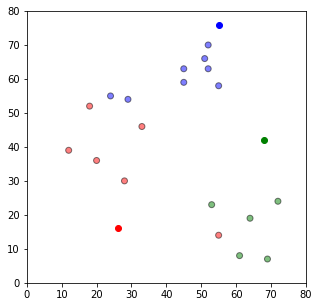

In [3]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    print(centroid_distance_cols)
    #print(df.loc[:, centroid_distance_cols].idxmin(axis=1))
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)  # will make column named 'closest' for distances from centroid-1,2,3 with returning first
                                                                      # occurance of minimum over requested axis(1 = min. over all columns in a single row)
    ''' DataFrame.loc

    Access a group of rows and columns by label(s) or a boolean array.
    .loc[] is primarily label based, but may also be used with a boolean array.
    DataFrame.idxmin-> Return index of first occurrence of minimum over requested axis.
    DataFrame.min-> Return value of first occurrence of minimum over requested axis.
    '''
    
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # strip the string 'distance_from_ from the closest column values'
    df['color'] = df['closest'].map(lambda x: colmap[x]) # make a coulmn name color and assign the values from colmap
    return df

df = assignment(df, centroids)
'''print(df.head())
print('----------')
print(df.count())
print('--------')
print(df.describe())'''
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
#print(df)

{1: [27.666666666666668, 36.166666666666664], 2: [63.8, 16.2], 3: [44.125, 61.0]}


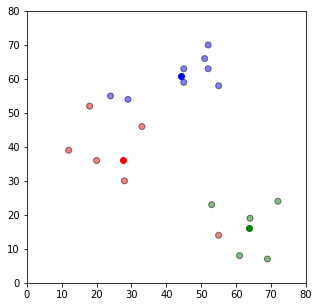

In [4]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print(centroids)
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

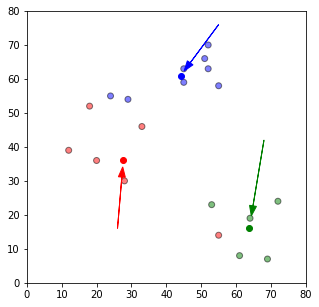

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()


['distance_from_1', 'distance_from_2', 'distance_from_3']


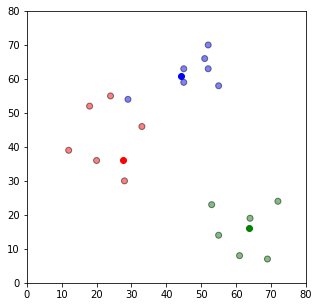

In [6]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


['distance_from_1', 'distance_from_2', 'distance_from_3']
['distance_from_1', 'distance_from_2', 'distance_from_3']


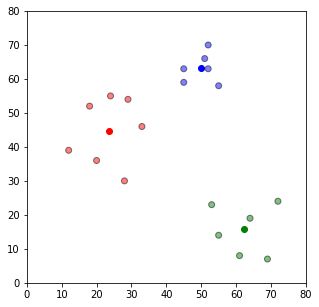

In [7]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


In [9]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)




In [11]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_


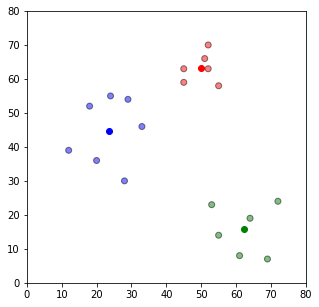

In [12]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels) # here map return map of the object not list -> need to convert colors to list object

plt.scatter(df['x'], df['y'], color=list(colors), alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [23]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'id': [0,1,2,3,4], 
    'option_1': [10,     np.nan, np.nan, 400,    600], 
    'option_2': [np.nan, 20,     300,    np.nan, 700], 
    'option_3': [np.nan, 200,    30,     np.nan, 50],
    'option_4': [110,    np.nan, np.nan, 40,     50], 
})

df['min_column'] = df.filter(like='option').idxmin(1)  # gives the column name of having minimum value
df['min_value'] = df.filter(like='option').min(1)  # gives the minimum values
print(df.head())
df.loc('option_1')

   id  option_1  option_2  option_3  option_4 min_column  min_value
0   0        10       NaN       NaN       110   option_1         10
1   1       NaN        20       200       NaN   option_2         20
2   2       NaN       300        30       NaN   option_3         30
3   3       400       NaN       NaN        40   option_4         40
4   4       600       700        50        50   option_3         50
